###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> FIT5147 Assignment 1

2. Instructions & Brief
In this assignment you are required to read in some data and explore and visualise it using Tableau Public, then submit a brief report showing the visualisations and findings. It is an individual assignment and worth 5% of your total mark for FIT5147.

Relevant learning outcomes for FIT5147: 

1. Perform exploratory data analysis using a range of visualisation tools;

6. Implement interactive data visualisations using R and other tools

Details of task:  

The data to be used for this assignment can be found under “Assessment Resources”. It consists of two separate files:

Pedestrian Counting System – Sensor Locations: This contains the spatial coordinates of pedestrian sensor devices located around the City of Melbourne, retrieved from https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234
Pedestrian Counting System – 2019: This contains the hourly pedestrian counts of each sensor during 2019, retrieved from https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp
While the data is publicly available at the included links, you must use the datasets found on this page.

Your task in this assignment is to:

Load both datasets in Tableau Public, linking the two in an appropriate manner
Check the data for any errors and/or issues, even though it is sourced from a government service
Explore the data using Tableau to answer the following two questions:

1. How does pedestrian traffic volume vary in different parts of Melbourne?

    
2. How does the day of the week and time affect overall pedestrian traffic volume?
    
Write a 4-5 page report containing two parts:
Data Wrangling: Detail any wrangling and cleaning you performed to import it into Tableau. This could include how the two datasets are linked prior to visualisation exploration steps and brief reports of any errors found in the datasets.
Data Exploration: Describe how you explored the data while answering the given questions.

In [1]:
#----------------------------------------Importing required libraries----------------------------------------
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True) #---------------adds hue to the color

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display #---------------------for displaying multiple data frames in one output

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package for generating test and train data

In [2]:
#----------------------------------------Reading dataset Sensor Location Data----------------------------------------
data_sensor_loc=pd.read_csv('Pedestrian_Counting_System_-_Sensor_Locations.csv')

In [3]:
#--------------------------------------Looking into the first few records of the Sensor data---------------------
data_sensor_loc.head()

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
0,59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)"
1,23,Spencer St-Collins St (South),Col623_T,2013/09/02,A,NaN,East,West,-37.819093,144.954527,"(-37.81909256, 144.95452749)"
2,20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)"
3,34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)"
4,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)"


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Column Description
    
1. Sensor ID - The unique ID of the sensor
2. Sensor Description - A description of where the sensor is located
3. Sensor Name - The name of the sensor
4. Installation Date - When the sensor was installed
5. Status - Status of each sensor (A = Active I = Inactive R = Removed)
6. Direction - Direction Information
7. Lat/Long - Latitude/Longitude

###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Data Wrangling

Checking the data for missing values, duplicates and unique entries

In [4]:
data_sensor_loc.shape

(66, 11)

In [5]:
data_sensor_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sensor_id           66 non-null     int64  
 1   sensor_description  66 non-null     object 
 2   sensor_name         66 non-null     object 
 3   installation_date   66 non-null     object 
 4   status              66 non-null     object 
 5   note                8 non-null      object 
 6   direction_1         62 non-null     object 
 7   direction_2         62 non-null     object 
 8   latitude            66 non-null     float64
 9   longitude           66 non-null     float64
 10  location            66 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 5.8+ KB


In [6]:
numeric_cols=[]
categorical_cols=[]

for i in data_sensor_loc.columns:
    if data_sensor_loc[i].dtypes!=object:
        numeric_cols.append(i)
    else:
        categorical_cols.append(i)

In [7]:
for i in categorical_cols:
    display(data_sensor_loc[i].value_counts(normalize=True))

Building 80 RMIT                        0.015152
State Library - New                     0.015152
Elizabeth St-Lonsdale St (South)        0.015152
The Arts Centre                         0.015152
State Library                           0.015152
                                          ...   
RMIT Building 14                        0.015152
Little Collins St-Swanston St (East)    0.015152
Melbourne Central                       0.015152
Bourke St - Spencer St (North)          0.015152
St Kilda Rd-Alexandra Gardens           0.015152
Name: sensor_description, Length: 66, dtype: float64

PriNW_T     0.015152
Swa31T_T    0.015152
Lyg260_T    0.015152
WebBN_T     0.015152
UM2_T       0.015152
              ...   
LtB170_T    0.015152
RMIT_T      0.015152
Rus180_T    0.015152
Col12_T     0.015152
NewQ_T      0.015152
Name: sensor_name, Length: 66, dtype: float64

2013/09/02    0.060606
2009/03/30    0.060606
2009/03/24    0.045455
2015/04/15    0.045455
2009/03/25    0.045455
2019/09/25    0.030303
2009/03/23    0.030303
2017/11/30    0.030303
2017/06/29    0.030303
2016/04/11    0.015152
2013/10/10    0.015152
2020/01/16    0.015152
2018/07/19    0.015152
2009/04/23    0.015152
2017/08/24    0.015152
2015/09/23    0.015152
2019/10/02    0.015152
2009/01/20    0.015152
2013/12/20    0.015152
2018/07/25    0.015152
2015/01/20    0.015152
2020/04/06    0.015152
2018/06/26    0.015152
2013/10/11    0.015152
2013/08/16    0.015152
2014/12/05    0.015152
2013/10/14    0.015152
2013/08/23    0.015152
2018/09/27    0.015152
2017/07/10    0.015152
2020/01/07    0.015152
2013/08/12    0.015152
2017/07/31    0.015152
2015/02/11    0.015152
2014/06/08    0.015152
2014/12/17    0.015152
2009/03/26    0.015152
2020/03/12    0.015152
2017/11/29    0.015152
2019/02/13    0.015152
2019/12/04    0.015152
2013/09/28    0.015152
2019/03/08    0.015152
2013/09/06 

A    0.893939
R    0.075758
I    0.030303
Name: status, dtype: float64

Device is upgraded in 26/02/2020                                                          0.125
Temporary for the duration of the metro tunnel works. Installed under the scaffolding.    0.125
Device has been removed (17/02/2017)                                                      0.125
Device moved to location ID 53 (22/09/2015)                                               0.125
In 4/12/2019 sensor upgraded                                                              0.125
Device has been removed (24/01/2017)                                                      0.125
Sensor relocated from 14 to 25 on 2/10/2019                                               0.125
sensor upgraded from laser to 3D on 19/12/2019                                            0.125
Name: note, dtype: float64

East     0.306452
South    0.290323
North    0.241935
West     0.161290
Name: direction_1, dtype: float64

West     0.306452
North    0.290323
South    0.241935
East     0.161290
Name: direction_2, dtype: float64

(-37.81234775, 144.96153311)    0.015152
(-37.81569416, 144.96680641)    0.015152
(-37.81911704, 144.96558256)    0.015152
(-37.81786445, 144.96506823)    0.015152
(-37.8016968, 144.96658911)     0.015152
                                  ...   
(-37.81909256, 144.95452749)    0.015152
(-37.80240719, 144.96156731)    0.015152
(-37.81573742, 144.96685718)    0.015152
(-37.80996494, 144.96216521)    0.015152
(-37.804024, 144.963084)        0.015152
Name: location, Length: 66, dtype: float64

In [8]:
data_sensor_loc.nunique()

sensor_id             66
sensor_description    66
sensor_name           66
installation_date     50
status                 3
note                   8
direction_1            4
direction_2            4
latitude              66
longitude             66
location              66
dtype: int64

In [9]:
data_sensor_loc[data_sensor_loc['direction_1'].isnull()]

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
16,16,Australia on Collins,Col270_T,2009/03/30,R,Device moved to location ID 53 (22/09/2015),NaN,NaN,-37.815734,144.965210,"(-37.81573423, 144.96521044)"
34,38,Flinders St-Swanston St (West),Swa11_T,2014/12/05,R,Device has been removed (17/02/2017),NaN,NaN,-37.817234,144.967150,"(-37.81723437, 144.96715033)"
35,32,City Square,CSq_T,2013/12/20,R,Device has been removed (24/01/2017),NaN,NaN,-37.815737,144.966857,"(-37.81573742, 144.96685718)"
40,13,Flagstaff Station,Wil277_T,2009/03/24,I,NaN,NaN,NaN,-37.812397,144.956527,"(-37.81239679, 144.95652653)"


In [10]:
data_sensor_loc[data_sensor_loc['status']=='R']

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
16,16,Australia on Collins,Col270_T,2009/03/30,R,Device moved to location ID 53 (22/09/2015),NaN,NaN,-37.815734,144.965210,"(-37.81573423, 144.96521044)"
34,38,Flinders St-Swanston St (West),Swa11_T,2014/12/05,R,Device has been removed (17/02/2017),NaN,NaN,-37.817234,144.967150,"(-37.81723437, 144.96715033)"
35,32,City Square,CSq_T,2013/12/20,R,Device has been removed (24/01/2017),NaN,NaN,-37.815737,144.966857,"(-37.81573742, 144.96685718)"
57,60,Flinders La - Swanston St (West) Temporary,Swa31T_T,2019/03/08,R,Temporary for the duration of the metro tunnel...,North,South,-37.816682,144.966895,"(-37.81668188, 144.9668954)"
65,15,State Library,QV_T,2009/03/25,R,NaN,South,North,-37.810644,144.964471,"(-37.81064378, 144.96447132)"


In [11]:
data_sensor_loc[data_sensor_loc['status']=='I']

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
40,13,Flagstaff Station,Wil277_T,2009/03/24,I,NaN,NaN,NaN,-37.812397,144.956527,"(-37.81239679, 144.95652653)"
53,33,Flinders St-Spring St (West),Spr13_T,2014/04/23,I,NaN,North,South,-37.814833,144.974541,"(-37.81483252, 144.97454056)"


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Findings

1. All sensors with missing directions were either removed or are inactive, hence they can be dropped for the analysis
2. Data is at a Sensor ID level, i.e. the primary key of the table is Sensor ID. This reflects that there are no duplicates in the data

In [12]:
#----------------------------------------Reading dataset Pedestrian----------------------------------------
pedestrian_count=pd.read_csv('Pedestrian_Counting_System_2019.csv')

In [13]:
pedestrian_count.head()

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,11/01/2019 17:00,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,11/01/2019 17:00,2019,November,1,Friday,17,39,Alfred Place,604
2,11/01/2019 17:00,2019,November,1,Friday,17,37,Lygon St (East),216
3,11/01/2019 17:00,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,11/01/2019 17:00,2019,November,1,Friday,17,36,Queen St (West),774


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Column Description
    
1. Date Time - Date and time of reading (dd/mm/yyyy hh:mm:ss)
2. Year - Year of reading
3. Month - Month of year (January, February, ...)
4. Mdate - Day of year (1, 2, 3, ..., 31)
5. Day - Day of the week
6. Time - Time of day (0 = midnight-1am, 1 = 1am-2am, 2 = 2am-3am, ..., 23 = 11pm-midnight)
7. Sensor_ID - Sensor ID
8. Sensor_Name - Sensor name
9. Hourly_Counts - Total hourly sensor readings (count of pedestrians )

In [14]:
pedestrian_count.shape

(456829, 9)

In [15]:
pedestrian_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456829 entries, 0 to 456828
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Date_Time      456829 non-null  object
 1   Year           456829 non-null  int64 
 2   Month          456829 non-null  object
 3   Mdate          456829 non-null  int64 
 4   Day            456829 non-null  object
 5   Time           456829 non-null  int64 
 6   Sensor_ID      456829 non-null  int64 
 7   Sensor_Name    456829 non-null  object
 8   Hourly_Counts  456829 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 31.4+ MB


In [16]:
pedestrian_count[['Year','Mdate','Time','Hourly_Counts']].describe().astype(int).T

,count,mean,std,min,25%,50%,75%,max
Year,456829,2019,0,2019,2019,2019,2019,2019
Mdate,456829,15,8,1,8,16,23,31
Time,456829,11,6,0,6,12,18,23
Hourly_Counts,456829,583,806,0,63,243,762,15979


In [17]:
pedestrian_count.nunique()

Date_Time        8760
Year                1
Month              12
Mdate              31
Day                 7
Time               24
Sensor_ID          58
Sensor_Name        61
Hourly_Counts    5238
dtype: int64

In [18]:
pedestrian_count[pedestrian_count['Sensor_ID']==33].head()

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
40202,1/01/2019 0:00,2019,January,1,Tuesday,0,33,Flinders St-Spring St (West),617
40251,1/01/2019 1:00,2019,January,1,Tuesday,1,33,Flinders St-Spring St (West),248
40300,1/01/2019 2:00,2019,January,1,Tuesday,2,33,Flinders St-Spring St (West),67
40349,1/01/2019 3:00,2019,January,1,Tuesday,3,33,Flinders St-Spring St (West),56
40398,1/01/2019 4:00,2019,January,1,Tuesday,4,33,Flinders St-Spring St (West),18


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Descriptive Statistics

In [19]:
def estimate_outlier(sensor):
    
    X=pedestrian_count[pedestrian_count['Sensor_Name']==sensor]
    Q1,Q3 = X['Hourly_Counts'].quantile(q=[0.25, 0.75])
    IQR = Q3 - Q1
    less_than_Q1 = X['Hourly_Counts'].apply(lambda x: 1 if x < (Q1 - 1.5*IQR) else 0)
    greater_than_Q3 = X['Hourly_Counts'].apply(lambda x: 1 if x > (Q3 + 1.5*IQR) else 0)
    
    total_values = X['Hourly_Counts'].shape[0]
    
    total_less_than_Q1 = np.sum(less_than_Q1)
    total_greater_than_Q3 = np.sum(greater_than_Q3)
    
    perc_less_than_Q1 = round((total_less_than_Q1 / total_values) * 100,2)
    perc_greater_than_Q3 = round((total_greater_than_Q3 / total_values) * 100,2)
    
    return { 'Sensor': sensor, 'Outliers <Q1 (%)':perc_less_than_Q1, 'Outliers >Q3 (%)': perc_greater_than_Q3}
    

In [20]:
def estimate_skewness(sensor):
    X=pedestrian_count[pedestrian_count['Sensor_Name']==sensor]
    skew = X['Hourly_Counts'].skew()
    skew_side = None
    if skew > 0 and skew > 0.05:
        skew_side = 'left'
    if skew < 0 and skew < -0.05:
        skew_side = 'right'
        
    return{'skew': skew, 'skew_side': skew_side}

In [21]:
def estimate_normality(sensor):
    X=pedestrian_count[pedestrian_count['Sensor_Name']==sensor]
    skew = X['Hourly_Counts'].skew()
    distribution = None
    skew = X['Hourly_Counts'].skew()
    stat, p = shapiro(X['Hourly_Counts'])
    alpha = 0.05
    confidence_percent = 0.90
    if p > alpha and stat > confidence_percent:
        distribution = 'normal'
    else:
        distribution = 'not normal'
    return {'distribution': distribution}

In [22]:
from scipy.stats import shapiro
sensor_name=np.array(pedestrian_count['Sensor_Name'].unique())
sensort_info=sensor_name.tolist()
sensort_info.sort()

data_analysis_list = []
for sensor in sensort_info:
    data_analysis = {}
    
    outlier = estimate_outlier(sensor)
    
    skewness = estimate_skewness(sensor)
    
    normality = estimate_normality(sensor)
    data_analysis.update(outlier)
    data_analysis.update(skewness)
    data_analysis.update(normality)
    data_analysis_list.append(data_analysis)
    
data_analysis_df = pd.DataFrame.from_dict(data=data_analysis_list)


In [23]:
data_analysis_df['Outliers (%)']=data_analysis_df['Outliers <Q1 (%)']+data_analysis_df['Outliers >Q3 (%)']
data_analysis_df[data_analysis_df['Outliers (%)']>6]

,Sensor,Outliers <Q1 (%),Outliers >Q3 (%),skew,skew_side,distribution,Outliers (%)
1,Birrarung Marr,0.0,6.96,6.356266,left,not normal,6.96
3,Bourke St Bridge,0.0,6.34,2.463447,left,not normal,6.34
35,Monash Rd-Swanston St (West),0.0,7.84,1.725764,left,not normal,7.84
44,QVM-Therry St (South),0.0,9.87,1.945031,left,not normal,9.87
48,Southern Cross Station,0.0,9.14,1.780764,left,not normal,9.14
54,Swanston St - RMIT Building 80,0.0,9.03,3.319948,left,not normal,9.03


In [24]:
outliers_4per=data_analysis_df[data_analysis_df['Outliers (%)']>6]

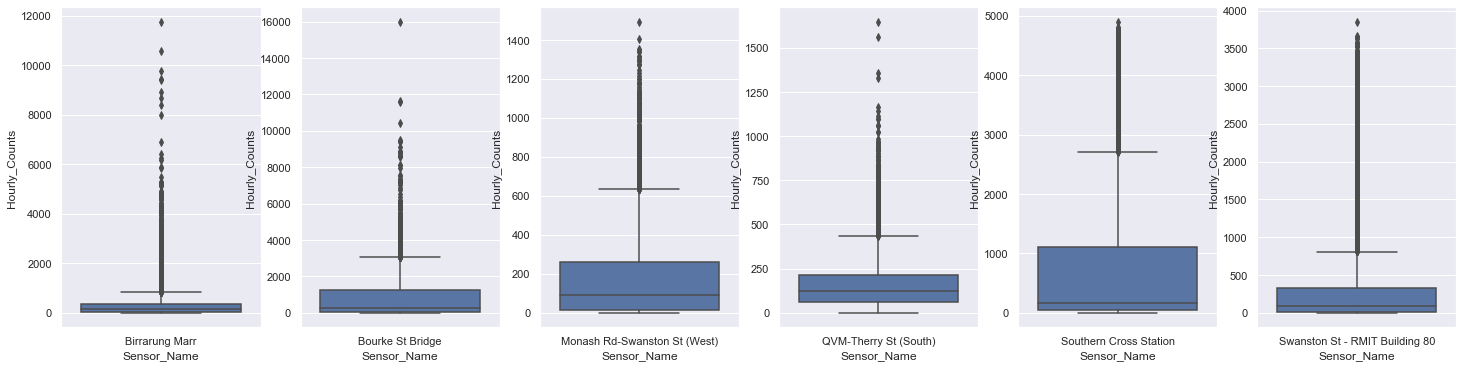

In [25]:
#-------------Getting Sensor Name----------------
sensor_name=np.array(outliers_4per['Sensor'].unique())
sensort_info=sensor_name.tolist()
sensort_info.sort()

plt.figure(figsize=(25,20))
pos=1
for i in sensort_info:
    plt.subplot(3,6,pos)
    interim_data=pedestrian_count[pedestrian_count['Sensor_Name']==i]
    sns.boxplot(y=interim_data['Hourly_Counts'],x=interim_data['Sensor_Name']);
    pos+=1


In [26]:
time_data=np.array(pedestrian_count['Time'].unique())
time=time_data.tolist()
time.sort()
print(time)

# plt.figure(figsize=(30,30))
# pos=1
# for i in numeric_cols:
#     plt.subplot(6,4,pos)
#     sns.boxplot(df[i])
#     pos+=1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


###  <span style="font-family: Calibri; font-size:1.5em;color:#000055"> Quality Check

In [27]:
ped_data_sensor=pedestrian_count[['Sensor_ID']]
ped_data_sensor.head()
sensor_pedestrian_data=ped_data_sensor.drop_duplicates(subset ="Sensor_ID", keep = "first")

In [28]:
display(sensor_pedestrian_data.head())
display(sensor_pedestrian_data.shape)

,Sensor_ID
0,34
1,39
2,37
3,40
4,36


(58, 1)

In [29]:
join_data=pd.merge(sensor_pedestrian_data,data_sensor_loc,left_on='Sensor_ID',right_on='sensor_id',how='inner')

In [30]:
join_data.shape

(58, 12)

In [31]:
join_data_check=pd.merge(data_sensor_loc,sensor_pedestrian_data,left_on='sensor_id',right_on='Sensor_ID',how='left')

In [32]:
join_data_check.head()

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location,Sensor_ID
0,59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)",59.0
1,23,Spencer St-Collins St (South),Col623_T,2013/09/02,A,NaN,East,West,-37.819093,144.954527,"(-37.81909256, 144.95452749)",23.0
2,20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)",20.0
3,34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)",34.0
4,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)",57.0


In [33]:
join_data_check[join_data_check['Sensor_ID'].isnull()]

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location,Sensor_ID
16,16,Australia on Collins,Col270_T,2009/03/30,R,Device moved to location ID 53 (22/09/2015),NaN,NaN,-37.815734,144.965210,"(-37.81573423, 144.96521044)",NaN
34,38,Flinders St-Swanston St (West),Swa11_T,2014/12/05,R,Device has been removed (17/02/2017),NaN,NaN,-37.817234,144.967150,"(-37.81723437, 144.96715033)",NaN
35,32,City Square,CSq_T,2013/12/20,R,Device has been removed (24/01/2017),NaN,NaN,-37.815737,144.966857,"(-37.81573742, 144.96685718)",NaN
40,13,Flagstaff Station,Wil277_T,2009/03/24,I,NaN,NaN,NaN,-37.812397,144.956527,"(-37.81239679, 144.95652653)",NaN
59,63,231 Bourke St,Bou231_T,2020/01/07,A,NaN,East,West,-37.813331,144.966756,"(-37.81333081, 144.96675572)",NaN
60,64,Royal Pde - Grattan St,Grat292_T,2020/01/16,A,NaN,North,South,-37.799495,144.957923,"(-37.79949544, 144.95792282)",NaN
63,65,Swanston St - City Square,SwaCs_T,2020/03/12,A,NaN,North,South,-37.815694,144.966806,"(-37.81569416, 144.96680641)",NaN
64,66,State Library - New,QVN_T,2020/04/06,A,NaN,South,North,-37.810578,144.964443,"(-37.81057845, 144.96444294)",NaN


In [34]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [35]:
locator = Nominatim(user_agent='myGeocoder')
coordinates = '53.480837, -2.244914'
location = locator.reverse(coordinates)
location.raw

{'place_id': 96393663,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 37139875,
 'lat': '53.4809597',
 'lon': '-2.2450668274629235',
 'display_name': 'Eagle Insurance Buildings, 68, Cross Street, Chinatown, City Centre, Manchester, Greater Manchester, North West England, England, M2 4JG, United Kingdom',
 'address': {'building': 'Eagle Insurance Buildings',
  'house_number': '68',
  'road': 'Cross Street',
  'neighbourhood': 'Chinatown',
  'suburb': 'City Centre',
  'city': 'Manchester',
  'county': 'Greater Manchester',
  'state_district': 'North West England',
  'state': 'England',
  'postcode': 'M2 4JG',
  'country': 'United Kingdom',
  'country_code': 'gb'},
 'boundingbox': ['53.480856', '53.4810634', '-2.2451761', '-2.2449576']}

In [36]:
location.raw['address']['suburb']

'City Centre'

In [37]:
def get_suburb(location):
    locator = Nominatim(user_agent='myGeocoder')
    location = locator.reverse(location)
    suburb=location.raw['address']['suburb']
    print(location.raw)
    return suburb
    

In [38]:
suburb_data=data_sensor_loc.copy()

In [39]:
suburb_data['coordinates']=suburb_data['location']
suburb_data['coordinates']=suburb_data['coordinates'].str.replace("(","")
suburb_data['coordinates']=suburb_data['coordinates'].str.replace(")","")
suburb_data.head()

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location,coordinates
0,59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)","-37.80825648, 144.96304859"
1,23,Spencer St-Collins St (South),Col623_T,2013/09/02,A,NaN,East,West,-37.819093,144.954527,"(-37.81909256, 144.95452749)","-37.81909256, 144.95452749"
2,20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)","-37.81172913, 144.9682466"
3,34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)","-37.81537985, 144.9741505"
4,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)","-37.8176735, 144.95025595"


In [40]:
suburb_data['suburb']=suburb_data['coordinates'].apply(lambda x: get_suburb(x))

{'place_id': 277112402, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 772558888, 'lat': '-37.8083473', 'lon': '144.9625355542447', 'display_name': 'RMIT University (City Campus), Swanston Street, Melbourne Innovation District, Melbourne City, City of Melbourne, Victoria, 3000, Australia', 'address': {'amenity': 'RMIT University (City Campus)', 'road': 'Swanston Street', 'commercial': 'Melbourne Innovation District', 'suburb': 'Melbourne City', 'municipality': 'City of Melbourne', 'state': 'Victoria', 'postcode': '3000', 'country': 'Australia', 'country_code': 'au'}, 'boundingbox': ['-37.8088691', '-37.8076358', '144.9616604', '144.9631266']}
{'place_id': 87811867, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 14664549, 'lat': '-37.8192061', 'lon': '144.9546639', 'display_name': 'Batman’s Hill on Collins, 623, Collins Street, Melbourne City, City of Mel

{'place_id': 5163929, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 87337974, 'lat': '-37.813390163426085', 'lon': '144.9730526569683', 'display_name': '18, Collins Street, Melbourne City, City of Melbourne, Victoria, 3000, Australia', 'address': {'house_number': '18', 'road': 'Collins Street', 'suburb': 'Melbourne City', 'municipality': 'City of Melbourne', 'state': 'Victoria', 'postcode': '3000', 'country': 'Australia', 'country_code': 'au'}, 'boundingbox': ['-37.813440163426', '-37.813340163426', '144.97300265697', '144.97310265697']}
{'place_id': 102614972, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 62106340, 'lat': '-37.8073439', 'lon': '144.9595400077224', 'display_name': "McDonald's, Therry Street, Melbourne Innovation District, Melbourne City, City of Melbourne, Victoria, 3000, Australia", 'address': {'amenity': "McDonald's", 'road': 'Therry

{'place_id': 236373681, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 6628717, 'lat': '-37.7970796', 'lon': '144.96130134414312', 'display_name': 'University of Melbourne, Story Street, Parkville, City of Melbourne, Victoria, 3010, Australia', 'address': {'amenity': 'University of Melbourne', 'road': 'Story Street', 'suburb': 'Parkville', 'municipality': 'City of Melbourne', 'state': 'Victoria', 'postcode': '3010', 'country': 'Australia', 'country_code': 'au'}, 'boundingbox': ['-37.8002764', '-37.7934748', '144.9529844', '144.9644538']}
{'place_id': 40079451, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 3046064444, 'lat': '-37.8146897', 'lon': '144.9427641', 'display_name': 'Fish Bar, Newquay Promenade, NewQuay, Docklands, City of Melbourne, Victoria, 3008, Australia', 'address': {'amenity': 'Fish Bar', 'road': 'Newquay Promenade', 'neighbourhoo

{'place_id': 99792521, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 48530808, 'lat': '-37.81216155', 'lon': '144.96149839830002', 'display_name': 'Askew House, Heape Court, Melbourne City, City of Melbourne, Victoria, 3000, Australia', 'address': {'building': 'Askew House', 'road': 'Heape Court', 'suburb': 'Melbourne City', 'municipality': 'City of Melbourne', 'state': 'Victoria', 'postcode': '3000', 'country': 'Australia', 'country_code': 'au'}, 'boundingbox': ['-37.8123945', '-37.8119303', '144.9613065', '144.9616634']}
{'place_id': 99639555, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 50051266, 'lat': '-37.81251695', 'lon': '144.9563578504892', 'display_name': 'AGC House, 277-287, William Street, Melbourne City, City of Melbourne, Victoria, 3000, Australia', 'address': {'building': 'AGC House', 'house_number': '277-287', 'road': 'William Street',

{'place_id': 6218349, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 663532430, 'lat': '-37.814772', 'lon': '144.974243', 'display_name': 'Mercure Melbourne Treasury Gardens, 13, Spring Street, Melbourne City, City of Melbourne, Victoria, 3000, Australia', 'address': {'tourism': 'Mercure Melbourne Treasury Gardens', 'house_number': '13', 'road': 'Spring Street', 'suburb': 'Melbourne City', 'municipality': 'City of Melbourne', 'state': 'Victoria', 'postcode': '3000', 'country': 'Australia', 'country_code': 'au'}, 'boundingbox': ['-37.814822', '-37.814722', '144.974193', '144.974293']}
{'place_id': 193531658, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 490235557, 'lat': '-37.82026255', 'lon': '144.96278627589265', 'display_name': 'Old Sandridge Railway Bridge, Queensbridge Square, Yarra’s Edge, Southbank, City of Melbourne, Victoria, Australia', 'addre

In [41]:
suburb_data.head()

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location,coordinates,suburb
0,59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)","-37.80825648, 144.96304859",Melbourne City
1,23,Spencer St-Collins St (South),Col623_T,2013/09/02,A,NaN,East,West,-37.819093,144.954527,"(-37.81909256, 144.95452749)","-37.81909256, 144.95452749",Melbourne City
2,20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)","-37.81172913, 144.9682466",Melbourne City
3,34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)","-37.81537985, 144.9741505",Melbourne City
4,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)","-37.8176735, 144.95025595",Docklands


In [42]:
sub=np.array(suburb_data['suburb'].unique())
sub_info=sub.tolist()

In [43]:
sub_info

['Melbourne City',
 'Docklands',
 'East Melbourne',
 'Carlton',
 'North Melbourne',
 'Southbank',
 'Parkville',
 'South Wharf']

In [44]:
suburb_data['suburb']=suburb_data['suburb'].apply(lambda x: 'Melbourne' if x=='Melbourne City' else x )

In [45]:
suburb_data['suburb']=suburb_data['suburb'].str.upper()

In [46]:
suburb_data.head()

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location,coordinates,suburb
0,59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)","-37.80825648, 144.96304859",MELBOURNE
1,23,Spencer St-Collins St (South),Col623_T,2013/09/02,A,NaN,East,West,-37.819093,144.954527,"(-37.81909256, 144.95452749)","-37.81909256, 144.95452749",MELBOURNE
2,20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)","-37.81172913, 144.9682466",MELBOURNE
3,34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)","-37.81537985, 144.9741505",MELBOURNE
4,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)","-37.8176735, 144.95025595",DOCKLANDS


In [47]:
suburb_data.to_csv('D:/Data Visualization - Assignments/Assignment 1/sensor_suburb.csv')